The following notebook is based on the working Geospatial Data.

The dataset can be downloaded from [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview).

The [CDS API](https://cds.climate.copernicus.eu/api-how-to) allows for programmatic access to this data store and is used to download the following data



*   Temperature of air at 2m above the surface - (2m Temperature - 2019 - December - First 7 days - 12:00 - Whole Available Region - NetCDF)

*   Total precipitation - (Total Precipitation - 2019 - December - First 7 days -12:00 - Whole Available Region - NetCDF)


*   Volumetric soil water layer 1 - (Volumetric soil water layer 1 - 2019 - December - First 7 days - 12:00 - Whole Available Region - NetCDF)






## Creating '.cdsapirc' 

In [ ]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 68734:ceaf88e4-e900-4691-91a0-a0fb14865ced'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 68734:ceaf88e4-e900-4691-91a0-a0fb14865ced


In [ ]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.4.0-py2.py3-none-any.whl size=11693 sha256=d226930f8e61676d816a44e65261f43904b337802a7fea8e2f5f4d94331be919
  Stored in directory: /root/.cache/pip/wheels/40/ee/c6/d596a9661e9408440cb33adc7881461cb1d69dbb455f808f78
Successfully built cdsapi


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cdsapi

# Downloading Dataset through cdsapi

## Temperature of air at 2m above the surface

In [ ]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'time': '12:00',
    },
    'temp.nc')

2020-12-05 13:04:27,014 INFO Welcome to the CDS
2020-12-05 13:04:27,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-05 13:04:27,173 INFO Request is completed
2020-12-05 13:04:27,174 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data1/adaptor.mars.internal-1607148499.5357397-27875-7-129586ef-9939-48f7-8cb7-9d405f99cca4.nc to temp.nc (86.6M)
2020-12-05 13:04:28,480 INFO Download rate 66.4M/s


Result(content_length=90793096,content_type=application/x-netcdf,location=http://136.156.132.153/cache-compute-0002/cache/data1/adaptor.mars.internal-1607148499.5357397-27875-7-129586ef-9939-48f7-8cb7-9d405f99cca4.nc)

## Total precipitation

In [ ]:
c1 = cdsapi.Client()

c1.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', 
        ],
        'time': '12:00',
    },
    'precipitation1.nc')

2020-12-05 13:04:38,785 INFO Welcome to the CDS
2020-12-05 13:04:38,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-05 13:04:40,423 INFO Request is completed
2020-12-05 13:04:40,424 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data3/adaptor.mars.internal-1606910688.2140152-15575-5-df0a2539-f0cb-4ed2-8e0e-ca23d92bd7a2.nc to precipitation1.nc (86.6M)
2020-12-05 13:04:42,056 INFO Download rate 53.1M/s


Result(content_length=90793088,content_type=application/x-netcdf,location=http://136.156.132.210/cache-compute-0005/cache/data3/adaptor.mars.internal-1606910688.2140152-15575-5-df0a2539-f0cb-4ed2-8e0e-ca23d92bd7a2.nc)

## Volumetric soil water layer 1

In [ ]:
c2 = cdsapi.Client()

c2.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'time': '12:00',
    },
    'volume_soil.nc')

2020-12-05 13:04:46,110 INFO Welcome to the CDS
2020-12-05 13:04:46,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-05 13:04:46,174 INFO Request is completed
2020-12-05 13:04:46,175 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data2/adaptor.mars.internal-1606830539.7203078-10169-1-ecc212be-ed44-4d9a-9c93-2bb986795e8e.nc to volume_soil.nc (86.6M)
2020-12-05 13:04:47,453 INFO Download rate 67.9M/s


Result(content_length=90793112,content_type=application/x-netcdf,location=http://136.156.132.201/cache-compute-0004/cache/data2/adaptor.mars.internal-1606830539.7203078-10169-1-ecc212be-ed44-4d9a-9c93-2bb986795e8e.nc)

# Opening dataset xarray

In [ ]:
ds = xr.open_dataset('temp.nc')

In [ ]:
ds1 = xr.open_dataset('precipitation1.nc')

In [ ]:
ds2 = xr.open_dataset('volume_soil.nc')

# Attributes



## 1. Temperature of air at 2m above the surface 

In [ ]:
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-05 06:08:22 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
print(ds['t2m'])

<xarray.DataArray 't2m' (time: 7, latitude: 1801, longitude: 3600)>
[45385200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature


## 2. Total precipitation

In [ ]:
print(ds1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-02 12:04:52 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
print(ds1['tp'])

<xarray.DataArray 'tp' (time: 7, latitude: 1801, longitude: 3600)>
[45385200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation


## 3. Volumetric soil water layer 1



In [ ]:
print(ds2)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-01 13:49:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
print(ds2['swvl1'])

<xarray.DataArray 'swvl1' (time: 7, latitude: 1801, longitude: 3600)>
[45385200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Attributes:
    units:      m**3 m**-3
    long_name:  Volumetric soil water layer 1


# Statistics



## 1. Temperature of air at 2m above the surface 

### Calculating mean

In [ ]:
mean=ds.t2m.mean()
print(mean.values)

268.3318


### Calculating median

In [ ]:
median=ds.t2m.median()
print(median.values)

264.14520263671875


### Calcualting standard deviation

In [ ]:
standar_dev=ds.t2m.std()
print(standar_dev.values)

22.902767181396484


### Calculating variance

In [ ]:
variance = ds.t2m.var()
print(variance.values)

524.5367431640625


### Range

In [ ]:
minimum = ds.t2m.min()
maximum = ds.t2m.max()
print('Range is',minimum.values,'to',maximum.values)

Range is 222.674560546875 to 315.6190185546875


The mean and median of "**Temperature of air at 2m above the surface**" is same, which means that the distribution is maybe symmetric around **268.33**(which is the mean). The standard deviation is **22.90** is high implies that most of the observations spread far from the mean. The range is **222.675** to **315.756**  

### Calculating Null

In [ ]:
null=ds.t2m.isnull()
print(null.sum().values)

29895159


The total missing values are **29895159**. The null observations can be filled with **mean** value.

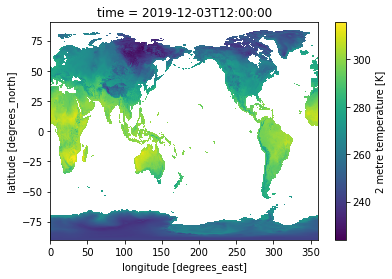

In [ ]:
ds.t2m[2].plot()

In [ ]:
df = ds.to_dataframe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f502fb15a20>]],
      dtype=object)

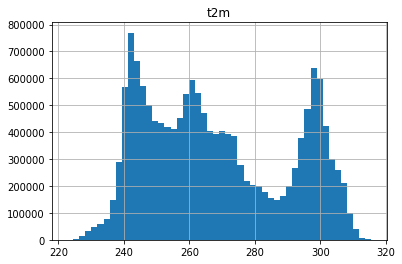

In [ ]:
df.hist(bins=50)

So on plotting the histogram of the observations are not symmetric even though the mean, median are same(almost). It is bimodal type of distribution

## 2. Total precipitation

### Calculating mean

In [ ]:
mean=ds1['tp'].mean()
print(mean.values)

0.00069437234


### Calculating median

In [ ]:
median=ds1['tp'].median()
print(median.values)

1.0408461093902588e-05


### Calcualting standard deviation

In [ ]:
standar_dev=ds1['tp'].std()
print(standar_dev.values)

0.0025139511562883854


### Calculating variance

In [ ]:
variance = ds1['tp'].var()
print(variance.values)

6.319950898614479e-06


### Range

In [ ]:
minimum = ds1['tp'].min()
maximum = ds1['tp'].max()
print('Range is',minimum.values,'to',maximum.values)

Range is 0.0 to 0.17055945098400116


For "**Total precipitation**" data mean is **0.000694** and median is **0.00001**. The standard deviation is **0.0025**, which is large as compared to mean indicating that data points are spread far from the mean. The range is **0** to **0.17**.

### Calculating Null

In [ ]:
null=ds1['tp'].isnull()
print(null.sum().values)

29895159


The total missing values are **29895159**. The null observations can be filled with **mean** value or can be filled MICE or Multivariate Imputation by Chained Equation can be used, which is an imputation method which works by filling the missing data multiple times.

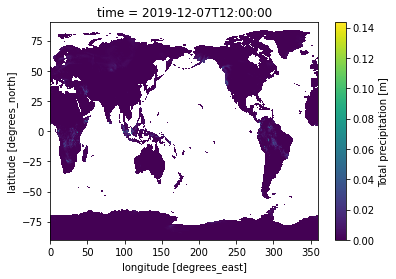

In [ ]:
ds1.tp[6].plot()

In [ ]:
df1 = ds1.to_dataframe()

In [ ]:
df1.skew()

tp    10.873617
dtype: float32

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f502f456550>]],
      dtype=object)

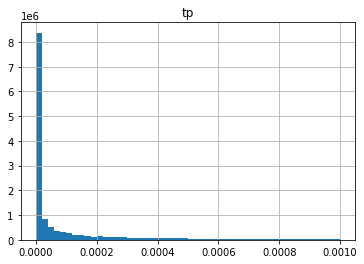

In [ ]:
df1.hist(bins=50, range=[0, 0.001])

From the plot it can be observed that the data points are right skewed.

## 3. Volumetric soil water layer 1



### Calculating mean

In [ ]:
mean=ds2['swvl1'].mean()
print(mean.values)

0.26458362


### Calculating median

In [ ]:
median=ds2['swvl1'].median()
print(median.values)

0.2705504894256592


### Calcualting standard deviation

In [ ]:
standar_dev=ds2['swvl1'].std()
print(standar_dev.values)

0.12834720313549042


### Calculating variance

In [ ]:
variance = ds2['swvl1'].var()
print(variance.values)

0.01647300273180008


### Range

In [ ]:
minimum = ds2['swvl1'].min()
maximum = ds2['swvl1'].max()
print('Range is',minimum.values,'to',maximum.values)

Range is 0.0 to 0.7660064697265625


For "**Volumetric soil water layer 1**" data mean is **0.26** and median is **0.27**, as the mean and median is nearly same the data points can be uniformly distributed. The standard deviation is **0.128**, which is large as compared to mean indicating that data points are spread far from the mean. The range is **0** to **0.766**.

### Calculating Null

In [ ]:
null=ds2['swvl1'].isnull()
print(null.sum().values)

29895159


The total missing values are **64061055**. The null observations can be filled with **mean** value or filling with MICE can be preferred.

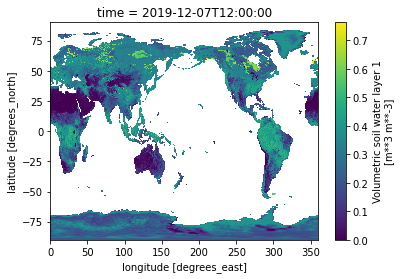

In [ ]:
ds2['swvl1'][6].plot()

In [ ]:
df2 = ds2.to_dataframe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f502f2485c0>]],
      dtype=object)

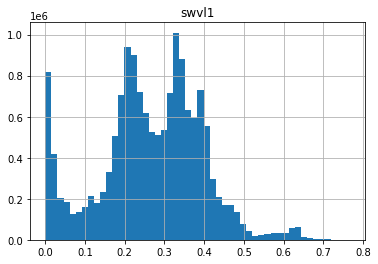

In [ ]:
df2.hist(bins=50)

So from the plot the data points are unimodal type of distribution. As the standard deviation is large the data points spread far from the mean.

# Preprocessing Geospatial Data

## Interpolation

In [ ]:
# Create new latitude and longitude
dx_new = 0.05
newlon = np.arange(0, 360, dx_new)
dx_new_ = -0.05
newlat = np.arange(90, -90+dx_new_, dx_new_)
#newlat = np.arange(-90, 90+dx_new, dx_new)


In [ ]:
dx_new = -0.05
test = np.arange(90, -90+dx_new, dx_new)
print(test)

[ 90.    89.95  89.9  ... -89.9  -89.95 -90.  ]


### 1. Temperature of air at 2m above the surface 

In [ ]:
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-05 06:08:22 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
# Interpolate
ds = ds.interp(latitude=newlat, longitude=newlon)

In [ ]:
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 3601, longitude: 7200, time: 7)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
  * latitude   (latitude) float64 90.0 89.95 89.9 89.85 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.05 0.1 0.15 ... 359.8 359.9 359.9 360.0
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan ... 243.1 nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-05 06:08:22 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


### 2. Total Precipiataiton 

In [ ]:
print(ds1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-02 12:04:52 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
# Interpolate
ds1 = ds1.interp(latitude=newlat, longitude=newlon)

In [ ]:
print(ds1)

<xarray.Dataset>
Dimensions:    (latitude: 3601, longitude: 7200, time: 7)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
  * latitude   (latitude) float64 90.0 89.95 89.9 89.85 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.05 0.1 0.15 ... 359.8 359.9 359.9 360.0
Data variables:
    tp         (time, latitude, longitude) float64 nan nan nan ... 0.0 nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-02 12:04:52 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


### 3. Volumteric soil water layer 1

In [ ]:
print(ds2)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-01 13:49:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [ ]:
# Interpolate
ds2 = ds2.interp(latitude=newlat, longitude=newlon)

In [ ]:
print(ds2)

<xarray.Dataset>
Dimensions:    (latitude: 3601, longitude: 7200, time: 7)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
  * latitude   (latitude) float64 90.0 89.95 89.9 89.85 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.05 0.1 0.15 ... 359.8 359.9 359.9 360.0
Data variables:
    swvl1      (time, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-01 13:49:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


## Taking care of skewness Total precipitation

In [ ]:
df1 = ds1.to_dataframe()

In [ ]:
df1.describe()

,tp
count,6.073510e+07
mean,6.800715e-04
std,2.524778e-03
min,0.000000e+00
25%,0.000000e+00
50%,1.040842e-05
75%,2.387911e-04
max,1.705581e-01


In [ ]:
df1.skew()

tp    10.873617
dtype: float32

Totoal precipitation have a skewness of **10.873617**, which is highly skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eb8f2c5c0>]],
      dtype=object)

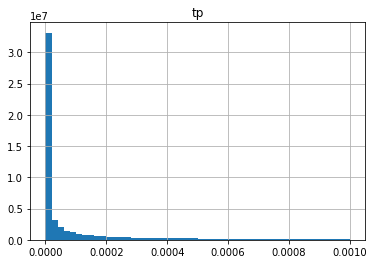

In [ ]:
df1.hist(bins=50, range=[0, 0.001])

Taking square root of dataset

In [ ]:
ds1_sqrt = np.sqrt(ds1)

In [ ]:
df1_sqrt = ds1_sqrt.to_dataframe()

In [ ]:
df1_sqrt.describe()

,tp
count,6.073510e+07
mean,1.284089e-02
std,2.269764e-02
min,0.000000e+00
25%,0.000000e+00
50%,3.226209e-03
75%,1.545287e-02
max,4.129868e-01


In [ ]:
df1_sqrt.skew()

tp    3.13238
dtype: float32

As we can observe the  skewness is reduced to **3.13** from **10.56** which is still a notable differnce.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d8b234e0>]],
      dtype=object)

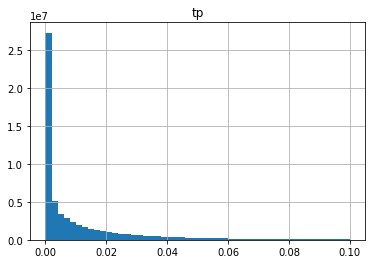

In [ ]:
df1_sqrt.hist(bins=50, range=[0, 0.1])

The distribution is preety much the same but the range is smaller.
Boxcox method can be used to take care of the skewed dataset but this dataset contains **0** values so it can't be used.

# Deep Learning for Geospatial Data

In [ ]:
temp = (ds['t2m'].values).ravel()
prep = (ds1_sqrt['tp'].values).ravel()
soil = (ds2['swvl1'].values).ravel()


In [ ]:
print('temp is ',temp)


temp is  [      nan       nan       nan ... 243.09929 243.09929 243.09929]


In [ ]:
print('prep is ',prep)


prep is  [nan nan nan ...  0.  0.  0.]


In [ ]:
print('soil is ',soil)

soil is  [      nan       nan       nan ... 0.2060981 0.2060981 0.2060981]


In [ ]:
dataset = pd.DataFrame({'temp':temp, 'soil':soil, 'prep':prep})

In [ ]:
print(dataset)

                temp      soil  prep
0                NaN       NaN   NaN
1                NaN       NaN   NaN
2                NaN       NaN   NaN
3                NaN       NaN   NaN
4                NaN       NaN   NaN
...              ...       ...   ...
45385195  243.099289  0.206098   0.0
45385196  243.099289  0.206098   0.0
45385197  243.099289  0.206098   0.0
45385198  243.099289  0.206098   0.0
45385199  243.099289  0.206098   0.0

[45385200 rows x 3 columns]


Using Mice to fill the missing values

In [ ]:
!pip install impyute

In [ ]:
from impyute.imputation.cs import mice
data = dataset.astype(float)
dataset = mice(data.values)

Since using mice is consuming more memory as compared to alloted one and showing error, so I am filling missing values with mean.

In [ ]:
mean = dataset['temp'].mean()
dataset['temp'].fillna(mean, inplace=True) 


In [ ]:
mean = dataset['soil'].mean()
dataset['soil'].fillna(mean, inplace=True) 

In [ ]:
mean = dataset['prep'].mean()
dataset['prep'].fillna(mean, inplace=True) 

In [ ]:
dataset.isnull().sum()

temp    0
soil    0
prep    0
dtype: int64

Printing the dataset after filling in the missing values

In [ ]:
print(dataset)

                temp      soil      prep
0         260.213348  0.266105  0.012798
1         260.213348  0.266105  0.012798
2         260.213348  0.266105  0.012798
3         260.213348  0.266105  0.012798
4         260.213348  0.266105  0.012798
...              ...       ...       ...
45385195  243.099289  0.206098  0.000000
45385196  243.099289  0.206098  0.000000
45385197  243.099289  0.206098  0.000000
45385198  243.099289  0.206098  0.000000
45385199  243.099289  0.206098  0.000000

[45385200 rows x 3 columns]


In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[2.6021335e+02 2.6610544e-01]
 [2.6021335e+02 2.6610544e-01]
 [2.6021335e+02 2.6610544e-01]
 ...
 [2.4309929e+02 2.0609809e-01]
 [2.4309929e+02 2.0609809e-01]
 [2.4309929e+02 2.0609809e-01]]


In [ ]:
print(y)

[0.01279823 0.01279823 0.01279823 ... 0.         0.         0.        ]


Splitting dataset into **Train / Validation /Test** in **80/ 10/ 10** i.e 80% data to training, 10% to validation and 10% to test, as we have a large data so it can be spilt in this fashion.

In [ ]:
# Importing library fot splitting
from sklearn.model_selection import train_test_split

In [ ]:
train_ratio = 0.80
validation_ratio = 0.1
test_ratio = 0.1

# train is now 98% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 1% of the initial data set
# validation is now 1% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

In [ ]:
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

In [ ]:
inputs

tensor([[-0.2091,  0.0068],
        [-1.0605,  0.6882],
        [-0.2091,  0.0068],
        ...,
        [-0.2091,  0.0068],
        [-0.2091,  0.0068],
        [-0.2091,  0.0068]])

In [ ]:
targets

tensor([0.0128, 0.0163, 0.0128,  ..., 0.0128, 0.0128, 0.0128])

In [ ]:
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(inputs, targets)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data loader
batch_size = 1000
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Observation in a batch of **1000** and printing first batch

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[-1.1914,  4.4760],
        [ 1.2274,  2.2828],
        [ 0.9368,  1.8149],
        ...,
        [ 2.0538, -2.5418],
        [-0.2091,  0.0068],
        [-0.2091,  0.0068]])
tensor([0.0051, 0.0058, 0.0159, 0.0128, 0.0056, 0.0128, 0.0213, 0.0128, 0.0128,
        0.0128, 0.0128, 0.0128, 0.0128, 0.0128, 0.0123, 0.0000, 0.0128, 0.0128,
        0.0054, 0.0128, 0.0628, 0.0128, 0.0128, 0.0128, 0.0128, 0.0128, 0.0128,
        0.0128, 0.0128, 0.0128, 0.0000, 0.0128, 0.0128, 0.0000, 0.0128, 0.0128,
        0.0000, 0.0128, 0.0000, 0.0128, 0.0000, 0.0143, 0.0000, 0.0128, 0.0128,
        0.0128, 0.0128, 0.0128, 0.0128, 0.0128, 0.0095, 0.0128, 0.0128, 0.0128,
        0.0128, 0.0128, 0.0000, 0.0128, 0.0163, 0.0000, 0.0000, 0.0101, 0.0128,
        0.0128, 0.0128, 0.0128, 0.0128, 0.0016, 0.0128, 0.0128, 0.0128, 0.0046,
        0.0128, 0.0128, 0.0128, 0.0528, 0.0128, 0.0128, 0.0274, 0.0128, 0.0128,
        0.0128, 0.0000, 0.0190, 0.0081, 0.0054, 0.0016, 0.0000, 0.0128, 0.0000,
        0.0247, 0.

In [ ]:
# Define model
model = nn.Linear(2, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.1509, -0.5993]], requires_grad=True)
Parameter containing:
tensor([0.3903], requires_grad=True)


In [ ]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1509, -0.5993]], requires_grad=True), Parameter containing:
 tensor([0.3903], requires_grad=True)]

In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 0.3547],
        [-0.1821],
        [ 0.3547],
        ...,
        [ 0.3547],
        [ 0.3547],
        [ 0.3547]], grad_fn=<AddmmBackward>)

Loss Function

In [ ]:
# Import nn.functional
import torch.nn.functional as F
# Define loss function
loss_fn = F.mse_loss

In [ ]:
targets.shape

torch.Size([36308160])

In [ ]:
temp = targets.reshape(len(targets), 1)

In [ ]:
temp.shape

torch.Size([36308160, 1])

In [ ]:
loss = loss_fn(preds, temp)
print('The inital loss is', loss.item())

The inital loss is 0.000552099256310612


## Optimize

In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

## Train the model

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            temp = yb.reshape(len(yb), 1)
            
            # 2. Calculate loss
            loss = loss_fn(pred, temp)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        print('Epoch [{}/{}], Loss: {:}'.format(epoch+1, num_epochs, loss.item()))
        print(loss)

In [ ]:
fit(5, model, loss_fn, opt, train_dl)

Epoch [1/5], Loss: 0.11125870794057846
tensor(0.1113, grad_fn=<MseLossBackward>)
Epoch [2/5], Loss: 0.02409730851650238
tensor(0.0241, grad_fn=<MseLossBackward>)
Epoch [3/5], Loss: 0.007241903804242611
tensor(0.0072, grad_fn=<MseLossBackward>)
Epoch [4/5], Loss: 0.0016955171013250947
tensor(0.0017, grad_fn=<MseLossBackward>)
Epoch [5/5], Loss: 0.00046997639583423734
tensor(0.0005, grad_fn=<MseLossBackward>)


On each epoch the model has improved significantly

In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[0.0236],
        [0.0188],
        [0.0236],
        ...,
        [0.0236],
        [0.0236],
        [0.0236]], grad_fn=<AddmmBackward>)

In [ ]:
# Compare with targets
targets

tensor([0.0128, 0.0163, 0.0128,  ..., 0.0128, 0.0128, 0.0128])

In [ ]:
temp = targets.reshape(len(targets), 1)
            
# 2. Calculate loss
loss = loss_fn(preds, temp)
print('mean squared error is',loss.item())
print(np.sqrt(loss.item()))

mean squared error is 0.000552099256310612
0.023496792468560724


The mean squared error of the train dataset is **0.00055**. On average each prediction differs from the actual target by about **0.0234**

### Testing validation set

In [ ]:
inputs_val = torch.from_numpy(x_val)
targets_val = torch.from_numpy(y_val)

In [ ]:
pred_val = model(inputs_val)

In [ ]:
pred_val

tensor([[ 0.0245],
        [ 0.0236],
        [ 0.0236],
        ...,
        [ 0.0236],
        [-0.0096],
        [ 0.0236]], grad_fn=<AddmmBackward>)

In [ ]:
targets_val

tensor([0.0032, 0.0128, 0.0128,  ..., 0.0128, 0.0541, 0.0128])

In [ ]:
temp1 = targets_val.reshape(len(targets_val), 1)
            
# 2. Calculate loss
loss = loss_fn(pred_val, temp1)
print(loss.item())
print(np.sqrt(loss.item()))

0.0005507125752046704
0.02346726603600578


The mean squared error of the validation set is **0.0005507**, which is similar as compared to the trained model. The prediciton differs from the actual values by about **0.0235**(on average) which compared with the actual values it is not performing well.

# Model with a hidden layer 

The performance of the model can be improved with the inclusion of hidden layer

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

Here I have used rectified linear function as the activation function. As relu function is capable of reporting zero values which are negative. Hence provide a sparse representation and is desirable as it can accelerate learning and simplify the model.

In [ ]:
net = Net(n_feature=2, n_hidden=5, n_output=1) 

In [ ]:
fit(5, net, loss_fn, opt, train_dl)

Epoch [1/5], Loss: 0.6588041186332703
tensor(0.6588, grad_fn=<MseLossBackward>)
Epoch [2/5], Loss: 0.643675684928894
tensor(0.6437, grad_fn=<MseLossBackward>)
Epoch [3/5], Loss: 0.6625985503196716
tensor(0.6626, grad_fn=<MseLossBackward>)
Epoch [4/5], Loss: 0.7286423444747925
tensor(0.7286, grad_fn=<MseLossBackward>)
Epoch [5/5], Loss: 0.6853386163711548
tensor(0.6853, grad_fn=<MseLossBackward>)


So the model trained above is not trained well enough. The loss has decreased as well as increased. It is probably because I have use relu activation function.

Relu function reports the negative values as zero, therefore makes its a sparse representation and would be switching off the hidden layer neurons while training it. Also I have scaled the dataset whose values is between -1 and 1, as result not much information reflected is by the neurons for the model to learn.

## Training validation model

In [ ]:
inputs_val = torch.from_numpy(x_val)
targets_val = torch.from_numpy(y_val)

In [ ]:
prednew_val = net(inputs_val)

In [ ]:
prednew_val

tensor([[-1.2961],
        [-0.7494],
        [-0.7494],
        ...,
        [-0.7494],
        [-1.2137],
        [-0.7494]], grad_fn=<AddmmBackward>)

In [ ]:
targets_val

tensor([0.0032, 0.0128, 0.0128,  ..., 0.0128, 0.0541, 0.0128])

In [ ]:
temp1 = targets_val.reshape(len(targets_val), 1)
            
# 2. Calculate loss
loss = loss_fn(prednew_val, temp1)
print(loss.item())
print(np.sqrt(loss.item()))

0.67824786901474
0.8235580544289152


The mean squared error of the model is **0.6782** and on average the predicted values differ from actual values by **0.8235** as a result the model has performed poorly. 

The predictions made by the model has negative values. As a result this model cannot be used for prediciton purposes.

In order to improve the above model scaling of the dataset can be done differently that allows the values between 0 and 1. One suggested scaling would be subtracting the minimum from the datapoint and dividing it by the maximum value of the dataset.

### Testing test set

In [ ]:
inputs_test = torch.from_numpy(x_test)
targets_test = torch.from_numpy(y_test)

In [ ]:
pred_test = model(inputs_test)

In [ ]:
pred_test

tensor([[0.0236],
        [0.0236],
        [0.0236],
        ...,
        [0.0236],
        [0.0236],
        [0.0236]], grad_fn=<AddmmBackward>)

In [ ]:
targets_test

tensor([0.0128, 0.0128, 0.0128,  ..., 0.0128, 0.0128, 0.0128])

In [ ]:
temp2 = targets_test.reshape(len(targets_test), 1)
            
# 2. Calculate loss
loss = loss_fn(pred_test, temp2)
print(loss.item())
print(np.sqrt(loss.item()))


0.0005542300059460104
0.023542090092980493


The mean squared error of the test set is **0.0005542** and on average the precited values and actual values differs by **0.02354**, which as compared to the actual values of precipitaion is not giving desirable results.

With more epochs, hidden layer and different scaling techniques the model can be improved.

## Saving model to checkpoint

Now as we have trained the model so it is important to save the trained model so that it can be used again and trained for better performance

The following codes will be save the weights and biases of the trained model so that it can be used later. 

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Linear(in_features=2, out_features=1, bias=True) 

The state dict keys: 

 odict_keys(['weight', 'bias'])


In [ ]:
from google.colab import files

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now the model is saved with a file name **checkpoint.pth**

## Loading model

In [ ]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['weight', 'bias'])


In [ ]:
model1 = nn.Linear(2, 1)

In [ ]:
model1.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
model1.parameters()

<generator object Module.parameters at 0x7fb2f9b91f68>

Model is successfully loaded and can be used again to make predicitons.

In [ ]:
preds1 = model1(inputs)
preds1

tensor([[0.0236],
        [0.0188],
        [0.0236],
        ...,
        [0.0236],
        [0.0236],
        [0.0236]], grad_fn=<AddmmBackward>)

In [ ]:
temp = targets.reshape(len(targets), 1)

In [ ]:
# 2. Calculate loss
loss = loss_fn(preds1, temp)
print(loss.item())


0.000552099256310612


# Concluding Remarks

Here I will list some of the problems that I have faced. After interpolating the data when it was used for the data preprocessing part of the deep learning, it was exhausting all the ram and the kernel was restarting again. So I have used the data without interpolation for training the deep learning model.
Also the ram was getting exhausted when I was filling the missing values with the help of MICE, so I have filled the missing values with mean of the data.